<a href="https://colab.research.google.com/github/S-loaiza-UAO/Deep-Learning/blob/main/Santiago_Loaiza_Taller_final_Modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Taller final del Módulo 1**
##*Procesamiento de Datos Secuenciales con Deep Learning*
### Autor: Santiago Loaiza Cardona - santiago.loaiza@uao.edu.co


###Introducción


Este taller final hará uso de red neuronales profundas para 2 aplicaciones comunes en el procesamiento de datos secuenciales: una en el contexto de reconocimiento de movimientos usando señales de un acelerómetro en el campo de HAR (Human Activity Recognition); la otra en el área de reconocimiento de audios.
Para esto se usarán redes MLP, convolucionales 1D, convolucionales 2D y redes recurrentes.

### Marco Teórico



* Para referencias del marco teorico dirigirse a revisar notas de COLAB modulo #1 ["clic aquí"](https://colab.research.google.com/drive/1klkdOQ2pc0e5r3RSULHfSr4fvgSOvCod?usp=sharing)

* Generacion de DataSet: La captura de datos se realizo con ayuda de la plataforma [Edge impulse](https://edgeimpulse.com/).
    * Para el punto #1 se usa el acelerómetro de un teléfono celular para capturar la informacion de una categoria en especifico durante 20 segundos. A continuacion se muestra una referencia de las señales captadas por el sensor acelerometro en los 3 ejes: X,Y y Z.

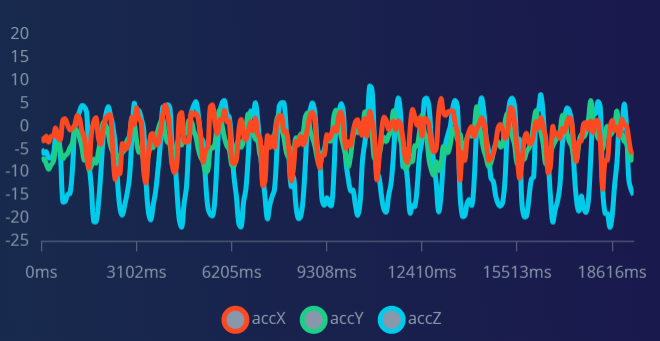

* Para el punto #2 se hace uso de un microfono integrado en una PC para capturar la informacion de una categoria en especico durante 1 segundo. A continuacion se muestra una imagen de referencia de la señal captada por el microfono.

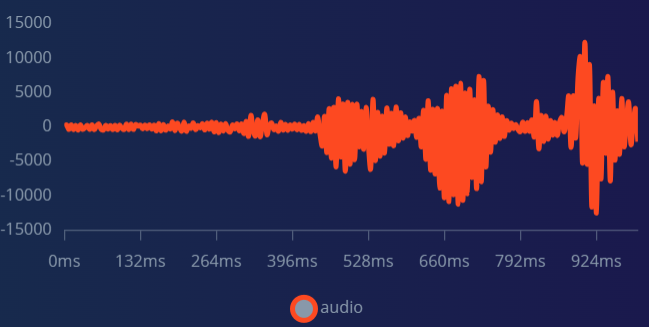


###Planteamiento del problema - Metodología

1. **Realizar una aplicación de HAR (*Human Activity Recognition*)** con un data set propio con cinco categorías, paso a paso:
* Captura de datos usando el acelerómetro de un teléfono celular.
* Aplicar conceptos de ciencia de datos para adquisicion, tratamiento, limpieza y dispocision de la informacion adecuada.
* Entrenamiento de tres modelos basados en redes neuronales profundas como MLP, Convolución 1D, Redes recurrentes en la plataforma TensorFlow-Keras.
* Visualizacion de diagramas de los diferentes modelos.
* Comparación de los diferentes modelos usando métricas adecuadas para cada caso.

2. **Realizar una aplicación de reconocimiento de audio** con un data set propio con cinco categorías, paso a paso:
* Captura de datos usando el micrófono integrado de un PC.
* Aplicar conceptos de ciencia de datos para adquicision, tratamiento, limpieza y dispocision de la informacion adecuada.
* Entrenamiento de dos modelos basados en redes neuronales profundas en la plataforma TensorFlow-Keras.
* Visualizacion de diagramas de los diferentes modelos.
* Comparación de los diferentes modelos usando métricas adecuadas para cada caso.


## Desarrollo punto #1
**Aplicación de HAR (Human Activity Recognition)**

### Pasos iniciales: captura de datos y ajuste de subconjuntos

In [85]:
!git clone https://github.com/S-loaiza-UAO/Deep-Learning
%cd Deep-Learning

Cloning into 'Deep-Learning'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (4/4), done.
remote: Total 65 (delta 3), reused 3 (delta 3), pack-reused 61
Receiving objects: 100% (65/65), 807.00 KiB | 8.97 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/content/Deep-Learning/Deep-Learning/Deep-Learning


In [2]:
# Se cargan las librerias
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import requests
from pathlib import Path
import json
import os

(1211, 3)


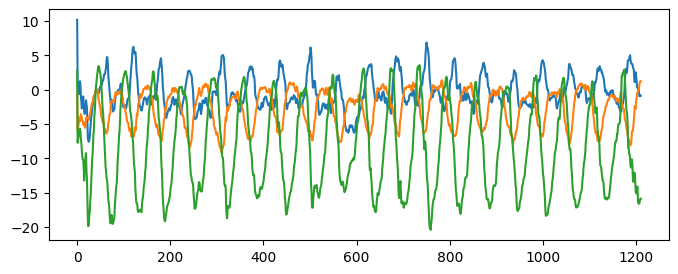

In [127]:
# Lectura de dato de prueba para visualizacion de la informacion
datatest = pd.read_json('wave1.json')
#print(datatest.to_string())
Valores = datatest.iloc[:,:].values
#print(Valores.shape)
#print(Valores)
#print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.figure(figsize=[8,3])
plt.plot(Datos1)

Al realizar una revision de los tamaños de los archivos se evidencia que los archivos tiene un tamaño de (1211,3) excepto los archivos wave1.json y wave2.json que tienen un tamaño (1212,3) por lo cual se debio modificar los .json eliminando el ultimo dato para modificar al shape inicial y poderlos leer de forma compatible.

In [4]:
# Lectura de archivos en Github almacenados en variable Datos
directory = os.getcwd()
files = os.listdir(directory)
files.sort()
#cantidadFiles = len(files)
cantidadFiles = 12
# Variable donde se almacenaron los datos leidos de los archivos *.json
Datos=np.zeros((cantidadFiles*1211,3))
i = 0
for file in files:
  if file.endswith("1.json"):
        # Leer archivo JSON
        with open(os.path.join(directory, file), "r") as f:
            # Mostrar nombre del archivo
            print(f"Leyendo archivo: {file}")
            dataframe = pd.read_json(file)
            Valores = dataframe.iloc[:,:].values
            DatosOriDF=Valores[7,2][0:-1]
            DatosOriNP=np.array(DatosOriDF)
            Datos[i*1211:(i+1)*1211] = DatosOriNP
            i+=1
            # Mostrar nombre del archivo leído
            #print(f"Archivo leído: {file}")
# Imprimir mensaje de finalización
print("Lectura de archivos JSON finalizada")
print('El tamaño final de la variable Datos es:',Datos.shape)

Leyendo archivo: bajar escaleras1.json
Leyendo archivo: bajar escaleras11.json
Leyendo archivo: caminata1.json
Leyendo archivo: caminata11.json
Leyendo archivo: shaking1.json
Leyendo archivo: shaking11.json
Leyendo archivo: subir escaleras1.json
Leyendo archivo: subir escaleras11.json
Leyendo archivo: trabajo de oficina reposo1.json
Leyendo archivo: trabajo de oficina reposo11.json
Leyendo archivo: wave1.json
Leyendo archivo: wave11.json
Lectura de archivos JSON finalizada
El tamaño final de la variable Datos es: (14532, 3)


Se requiere validar el porque con la mitad de la informacion da el mismo tamaño: (29064,3) cuando deberia ser de (7266,3)

**R/** Porque la variable inicial cantidadFiles estaba generando la matriz np.zeros con todos los archivos del repositorio (24) y no con los archivos 1.json (6)




Con el objetivo de mejorar los resultados del modelo se adicionaron mas muestras al modelo en la variable Datos, pasando de (7266,3) a (14532,3).

In [5]:
# Escalado de la variable Datos con metodo MinMaxScaler()
scaler1 = MinMaxScaler()
scaler1.fit(Datos)
DatosN=scaler1.transform(Datos)

Text(0.5, 1.0, 'Datos Normalizados')

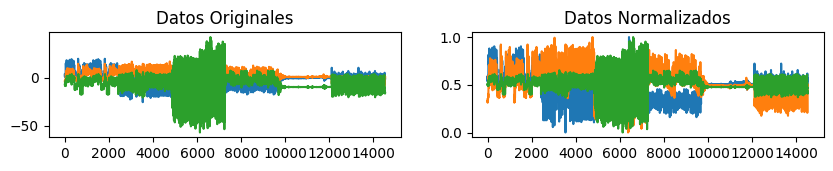

In [6]:
plt.figure(figsize=[10,3])
plt.subplot(221);plt.plot(Datos);plt.title("Datos Originales")
plt.subplot(222);plt.plot(DatosN);plt.title("Datos Normalizados")

###Aplicacion del modelo convolución 1D

In [7]:
# Se crean variables para la entrada de entrenamiento del modelo
# Las dimensiones dependeran del tamaño de la ventana de procesamiento de los datos.
# De la cantidad de patrones de entrenamiento que se generan y de la cantidad de canales

# Se debe realizar un reshape de la variable DatosN.shape(7266,3)
# Para la version 2 del modelo se realiza un reshape de (42,346,3)

Xtrain1D=np.zeros((12,1211,3))

for i in range(12):
    Xtrain1D[i,:,0]=DatosN[i*1211:(i+1)*1211,0].T
    Xtrain1D[i,:,1]=DatosN[i*1211:(i+1)*1211,1].T
    Xtrain1D[i,:,2]=DatosN[i*1211:(i+1)*1211,2].T
    Xtrain1D[i,:,0]=DatosN[i*1211:(i+1)*1211,0].T
    Xtrain1D[i,:,1]=DatosN[i*1211:(i+1)*1211,1].T
    Xtrain1D[i,:,2]=DatosN[i*1211:(i+1)*1211,2].T
    Xtrain1D[i,:,0]=DatosN[i*1211:(i+1)*1211,0].T
    Xtrain1D[i,:,1]=DatosN[i*1211:(i+1)*1211,1].T
    Xtrain1D[i,:,2]=DatosN[i*1211:(i+1)*1211,2].T

print('El tamaño para metodo 1D',Xtrain1D.shape)

El tamaño para metodo 1D (12, 1211, 3)


El tamaño del modelo de entrenamiento se define de la siguiente manera:
**(12 , 1211 , 3)**

* 12= numero de muestras en las categorias a evaluar dentro del modelo.
* 1211= cada muestra tiene un tamaño de (1211,3) y debido a que el modelo cuenta con 2 muestras por cada categoria.
* 3= numero de canales de la señal, en este caso de medicion por acelerometro se cuenta con 3 señales= X,Y y Z.

En este punto del modelo se define que las clases que se estan evaluando estan determinadas de la siguiente manera:
0. bajar escaleras
1. caminata
2. shaking
3. subir escaleras
4. trabajo de oficina reposo
5. wave

De igual forma de reitera que la data visualizada esta distribuida asi:
* Eje X: color naranja.
* Eje Y: color verde.
* Eje Z: color azul.

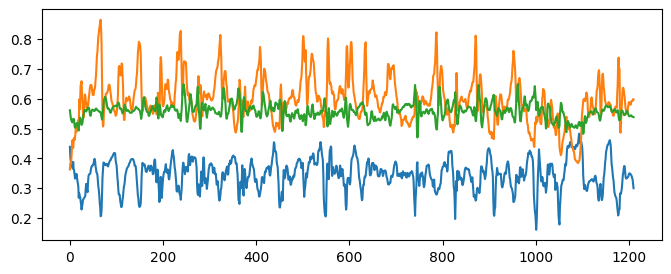

In [8]:
# Se visualiza un patrón de entrenamiento
# valores de prueba entre [0-11]
plt.figure(figsize=[8,3])
plt.plot(Xtrain1D[7,:,:])

In [9]:
# Se definen las etiquetas para la salida del modelo
YtrainIni=np.zeros((12,1))
for i in range(2):
    YtrainIni[i]=0
for i in range(2,4):
    YtrainIni[i]=1
for i in range(4,6):
    YtrainIni[i]=2
for i in range(6,8):
    YtrainIni[i]=3
for i in range(8,10):
    YtrainIni[i]=4
for i in range(10,12):
    YtrainIni[i]=5
print(YtrainIni)

[[0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [3.]
 [3.]
 [4.]
 [4.]
 [5.]
 [5.]]


In [10]:
Ytrain1D=  keras.utils.to_categorical(YtrainIni)
print(Ytrain1D)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1211, 32)          320       
                                                                 
 conv1d_1 (Conv1D)           (None, 1211, 64)          6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 1211, 128)         24704     
                                                                 
 max_pooling1d (MaxPooling1  (None, 606, 128)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 77568)             0         
                                                                 
 dense (Dense)               (None, 6)                 465414    
                                                        

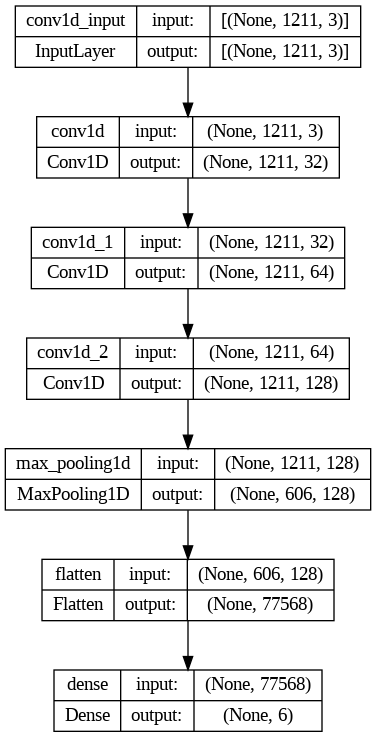

In [11]:
# Modelo secuencial en Keras con capas convolucionales 1D y una capa clasificadora densa tipo softmax
modelo = keras.models.Sequential()
modelo.add(keras.layers.Conv1D(32, 3, activation="relu",padding="same", input_shape=(1211,3)))
modelo.add(keras.layers.Conv1D(64, 3, activation="relu",padding="same"))
modelo.add(keras.layers.Conv1D(128, 3, activation="relu",padding="same"))
modelo.add(keras.layers.MaxPooling1D(pool_size=2,strides=2, padding='same'))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(6, activation = 'softmax'))
# Se muestra el resumen de la arquitectura del modelo
modelo.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [12]:
# Entrenamiento  del modelo
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = modelo.fit(Xtrain1D,Ytrain1D, epochs=250,batch_size=None)

Epoch 1/250
1/1 [==============================] - 7s 7s/step - loss: 1.7818 - accuracy: 0.3333
Epoch 2/250
1/1 [==============================] - 0s 221ms/step - loss: 1.6049 - accuracy: 0.3333
Epoch 3/250
1/1 [==============================] - 0s 195ms/step - loss: 1.2783 - accuracy: 0.5000
Epoch 4/250
1/1 [==============================] - 0s 243ms/step - loss: 1.0718 - accuracy: 0.6667
Epoch 5/250
1/1 [==============================] - 0s 215ms/step - loss: 0.7957 - accuracy: 0.8333
Epoch 6/250
1/1 [==============================] - 0s 185ms/step - loss: 0.6317 - accuracy: 0.8333
Epoch 7/250
1/1 [==============================] - 0s 208ms/step - loss: 0.4861 - accuracy: 0.9167
Epoch 8/250
1/1 [==============================] - 0s 207ms/step - loss: 0.3161 - accuracy: 1.0000
Epoch 9/250
1/1 [==============================] - 0s 217ms/step - loss: 0.2138 - accuracy: 1.0000
Epoch 10/250
1/1 [==============================] - 0s 230ms/step - loss: 0.1431 - accuracy: 1.0000
Epoch 11/250

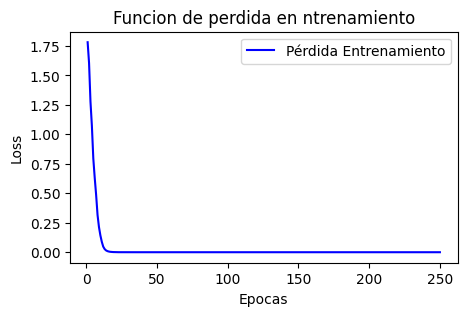

In [18]:
# Visualizacion de funcion de perdida por epocas
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)
plt.figure(figsize=[5,3])
plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Funcion de perdida en ntrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

En este punto ya se cuenta con un modelo de convolucion 1D entrenado para realizar test, lo que prosigue es cargar los datos de testeo para evaluar el modelo y observar resultados con la matriz de confusion.

Los datos de testeo son diferentes a los de entrenamiento, estan considerados dentro de la misma categoria aunque como muestras separadas. Al momento de capturar la data se realizo 3 veces el mismo ejercicio. *2 muestras para entrenamiento y 1 muestra para testeo.*


In [14]:
# Lectura de archivos en Github almacenados en variable Datos para testeo
directory = os.getcwd()
files = os.listdir(directory)
files.sort()
cantidadFiles = 6
# Variable donde se almacenaron los datos leidos de los archivos *.json
DatosVal=np.zeros((cantidadFiles*1211,3))
i = 0
for file in files:
  if file.endswith("2.json"):       # Para el caso del testeo se tienen almacenadas unas muestras con el numero 2.json
        # Leer archivo JSON
        with open(os.path.join(directory, file), "r") as f:
            # Mostrar nombre del archivo
            print(f"Leyendo archivo: {file}")
            dataframe = pd.read_json(file)
            Valores = dataframe.iloc[:,:].values
            DatosOriDF=Valores[7,2][0:-1]
            DatosOriNP=np.array(DatosOriDF)
            DatosVal[i*1211:(i+1)*1211] = DatosOriNP
            i+=1
# Imprimir mensaje de finalización
print("Lectura de archivos JSON testeo finalizada")
print('El tamaño final de la variable DatosVal es:',DatosVal.shape)

Leyendo archivo: bajar escaleras2.json
Leyendo archivo: caminata2.json
Leyendo archivo: shaking2.json
Leyendo archivo: subir escaleras2.json
Leyendo archivo: trabajo de oficina reposo.2.json
Leyendo archivo: wave2.json
Lectura de archivos JSON testeo finalizada
El tamaño final de la variable DatosVal es: (7266, 3)


Text(0.5, 1.0, 'Datos Entrenamiento Normalizados')

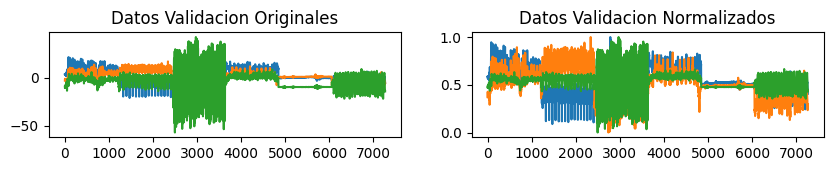

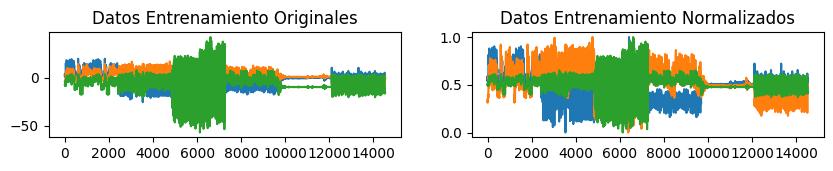

In [15]:
# Se escalan los datos de testeo y se visualizan
plt.figure(figsize=[10,3])
DatosValN=scaler1.transform(DatosVal)
plt.subplot(221);plt.plot(DatosVal);plt.title("Datos Validacion Originales")
plt.subplot(222);plt.plot(DatosValN);plt.title("Datos Validacion Normalizados")
plt.figure(figsize=[10,3])
#Se comparan los tamaños de datos de forma visual
plt.subplot(221);plt.plot(Datos);plt.title("Datos Entrenamiento Originales")
plt.subplot(222);plt.plot(DatosN);plt.title("Datos Entrenamiento Normalizados")

En este punto se logra observar la diferencia en el tamaño de muestra del entrenamiento vs el testeo. Sin embargo esta relacion aun podria considerarse pequeña ya que se busca como minimo conserva una relacion 80/20: donde el 80% de datos corresponde al entrenamiento y el 20% al testeo.

Para este caso tendriamos 66% para entrenamiento y 33% para testeo.

**Como primera observacion esto podria inducir mayor error al modelo y bajar su rendimiento**

In [16]:
XVal=np.zeros((6,1211,3))

for i in range(6):
    XVal[i,:,0]=DatosValN[i*1211:(i+1)*1211,0].T
    XVal[i,:,1]=DatosValN[i*1211:(i+1)*1211,1].T
    XVal[i,:,2]=DatosValN[i*1211:(i+1)*1211,2].T
    XVal[i,:,0]=DatosValN[i*1211:(i+1)*1211,0].T
    XVal[i,:,1]=DatosValN[i*1211:(i+1)*1211,1].T
    XVal[i,:,2]=DatosValN[i*1211:(i+1)*1211,2].T
    XVal[i,:,0]=DatosValN[i*1211:(i+1)*1211,0].T
    XVal[i,:,1]=DatosValN[i*1211:(i+1)*1211,1].T
    XVal[i,:,2]=DatosValN[i*1211:(i+1)*1211,2].T

print(XVal.shape)

(6, 1211, 3)


En este punto vamos a validar de manera visual si las categorias anteriormente divididas si corresponden a su data de testeo.

Entrenamiento vs. Testeo

Text(0.5, 1.0, 'Datos Validacion')

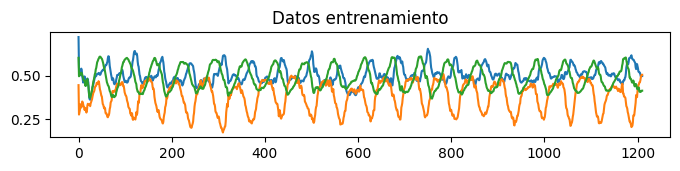

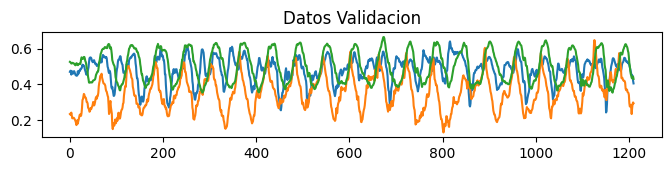

In [17]:
#Visualizacion de la data comparando datos de entrenamiento vs testeo
i=5
it=i*2
plt.figure(figsize=[8,3])
plt.subplot(211);plt.plot(Xtrain1D[it,:,:]);plt.title("Datos entrenamiento")
# Se grafica uno de los patrones que se usarán en el testeo
plt.figure(figsize=[8,3])
plt.subplot(212);plt.plot(XVal[i,:,:]);plt.title("Datos Validacion")

In [20]:
# Se definen las etiquetas para la salida del modelo
YValIni=np.zeros((6,1))
for i in range(6):
    YValIni[i]=i
    i=i+1
print(YValIni)
# Se convierten las etiquetas a codificación "one hot" que es la
# usará el modelo
YVal= keras.utils.to_categorical(YValIni)
print(YVal)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [21]:
# Evaluacion del modelo con los datos de testeo
modelo.evaluate(XVal, YVal)

1/1 [==============================] - 0s 360ms/step - loss: 5.4621 - accuracy: 0.6667


[5.462066173553467, 0.6666666865348816]

*A continuacion ejecutaremos las metricas de rendimiento del modelo:*


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

1/1 [==============================] - 0s 244ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1

    accuracy                           0.67         6
   macro avg       0.50      0.67      0.56         6
weighted avg       0.50      0.67      0.56         6

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


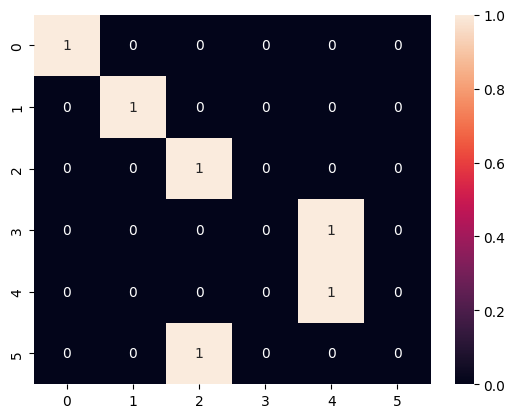

In [23]:
# Calculo de métricas del modelo con los datos de testeo incluyendo la matriz de confusión
ypredic=modelo.predict(XVal)

y_test_class = np.argmax(YVal,axis=1)
y_pred_class = np.argmax(ypredic,axis=1)

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm1D = confusion_matrix(y_test_class, y_pred_class)
print(cm1D)
# visualize the confusion matrix in a heat map
df_cm1D = pd.DataFrame(cm1D)
heatmap = sns.heatmap(df_cm1D, annot=True, fmt="d")

####**Conclusiones modelo 1D:**

* **En primera instancia el modelo evaluado presenta un accuracy de 0.6667, es necesario evaluar el porque.**

* Inicialmente se evaluo la red con una configuracion de 3 capas convolucionales con 16, 32 y 64 neuronas obteniendo un resultado de accuracy de 0.6667.

* Posterior se realizo una modificacion al modelo, aumentando el numero de neuronas en cada capa convolucional asi: 16 a 32, 32 a 64 y 64 a 128 (se duplicaron las neuronas por cada capa) al evaluar nuevamente el modelo arroja una mejoria en el accuracy con un resultado de 0.8333

* Sin embargo al momento de realizar un 2do entrenamiento con las mismas caracteristicas se observa un retroceso al accuracy inicial. Por lo tanto se concluya que el aumentar el numero de neuronas no esta beneficiando este modelo.

* Es importante aclarar que los resultados que se visualizan en la matriz de confusion relacionados como clase 0, 1, 2, 3, 4, 5 corresponden a las categorias mencionadas para este modelo.

* Se puede observar que el modelo tiene un buen desempeño con las clases 0 y 1, prediciendo todas las instancias correctamente.
* Sin embargo, el modelo tiene dificultades para diferenciar entre las clases 2, 3, 4 y 5, cometiendo errores de clasificación en estas clases.
* Se realiza entonces un analisis de las instancias mal clasificadas para comprender mejor las fuentes de error y considerar posibles mejoras en el modelo.
  * Revision de la clase 3: al comparar la informacion de entrenamiento vs la informacion de testeo se puede observar que las señales tanto en el eje X como en Z se ven en rangos diferentes y esto se puede *asociar a la forma en como depronto se toman las muestras las cuales pueden variar partiendo incluso (para este caso particular) de la posicion del telefono con que fueron capturados los datos.*


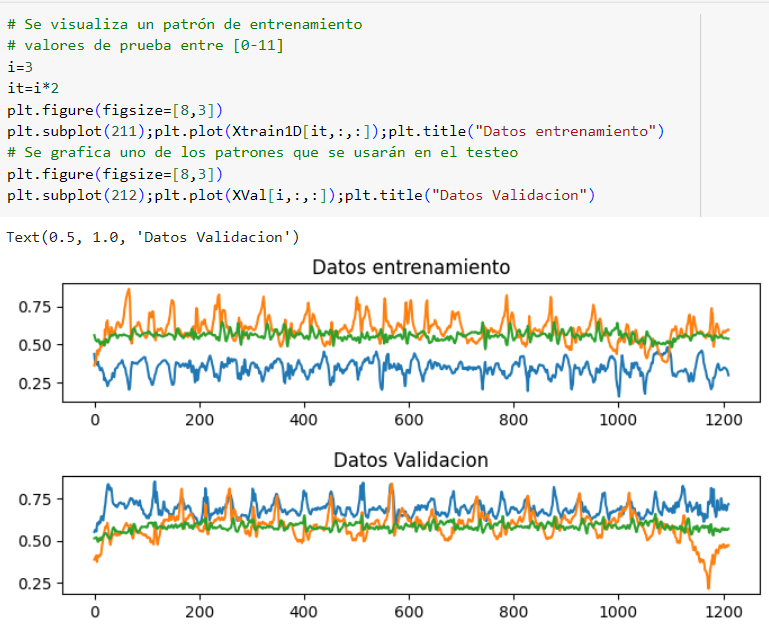

* De la misma forma se podria asociar que la data capturada para la categoria 4 tambien presenta cambios en las señales que podrian estar asociadas a cambios durante la captura de datos, generando asi errores inducidos por la data.

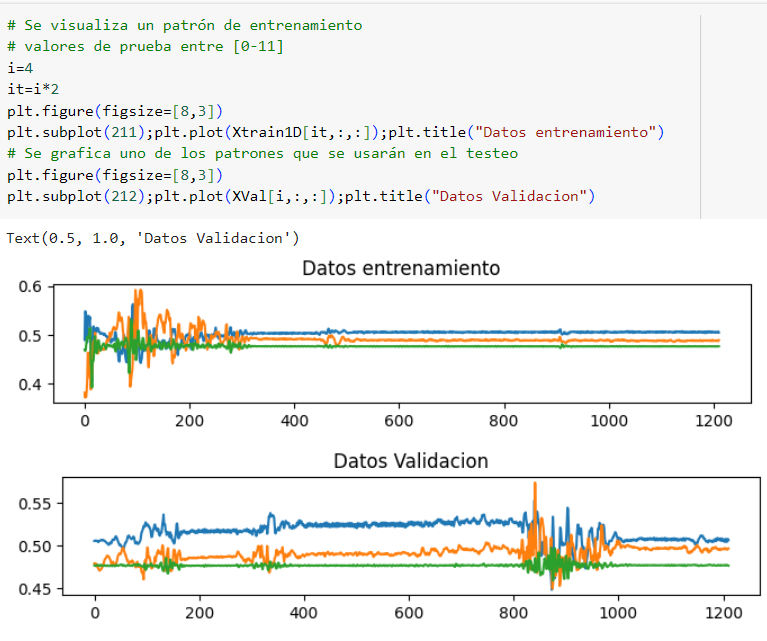

* Al igual que la categoria 3 se observa variaciones en las señales. Esto puede ser inducido por la posicion del celular al momento de capturas los datos.

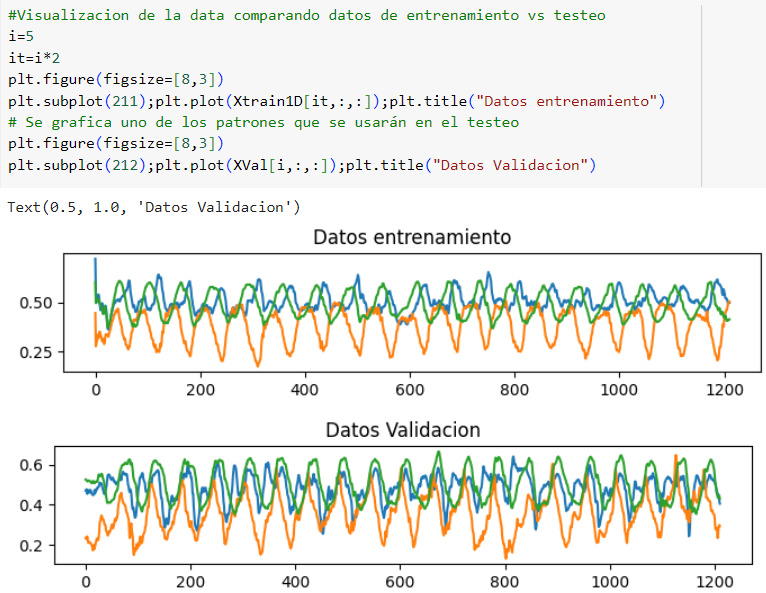

### Aplicacion del modelo Redes recurrentes RNN

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1211, 64)          4352      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 7654 (29.90 KB)
Trainable params: 7654 (29.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


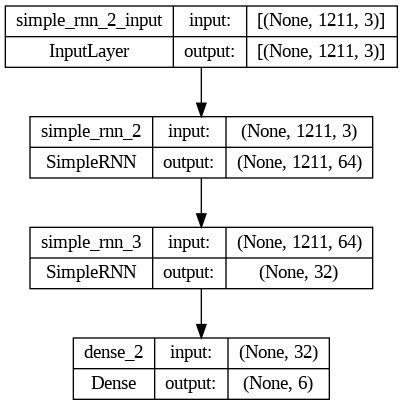

In [29]:
# Modelo secuencial en Keras con capas densas
modeloRNN = keras.models.Sequential()
modeloRNN.add(keras.layers.SimpleRNN(64, return_sequences=True, input_shape=[1211, 3]))
modeloRNN.add(keras.layers.SimpleRNN(32))
modeloRNN.add(keras.layers.Dense(6))
# Se muestra el resumen de la arquitectura del modelo
modeloRNN.summary()
# Se muestra un esquema del modelo RNN
keras.utils.plot_model(modeloRNN, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [30]:
# Entrenamiento  del modelo
modeloRNN.compile('adam','mse',metrics=['accuracy'])
# Se entrena el modelo
historiaRNN=modeloRNN.fit(Xtrain1D,Ytrain1D,validation_data=(XVal, YVal),epochs=100,verbose=1)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.9876 - accuracy: 0.1667 - val_loss: 0.4373 - val_accuracy: 0.1667
Epoch 2/100
1/1 [==============================] - 1s 703ms/step - loss: 0.4478 - accuracy: 0.1667 - val_loss: 0.4332 - val_accuracy: 0.1667
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 0.4464 - accuracy: 0.1667 - val_loss: 0.3253 - val_accuracy: 0.1667
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.3248 - accuracy: 0.1667 - val_loss: 0.2517 - val_accuracy: 0.1667
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.2441 - accuracy: 0.1667 - val_loss: 0.2153 - val_accuracy: 0.1667
Epoch 6/100
1/1 [==============================] - 1s 668ms/step - loss: 0.2044 - accuracy: 0.1667 - val_loss: 0.1947 - val_accuracy: 0.1667
Epoch 7/100
1/1 [==============================] - 1s 657ms/step - loss: 0.1854 - accuracy: 0.3333 - val_loss: 0.1825 - val_accuracy: 0.1667
Epoch 8/100
1/1 [========

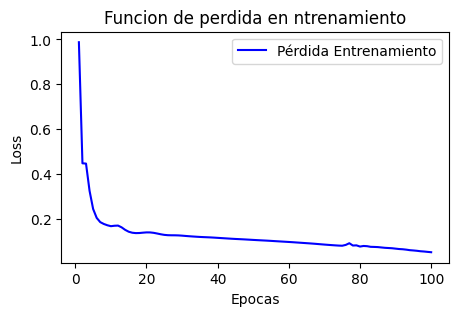

In [31]:
# Visualizacion de funcion de perdida por epocas
perdida_train = historiaRNN.history['loss']
epocas = range(1, len(perdida_train) + 1)
plt.figure(figsize=[5,3])
plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Funcion de perdida en ntrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
# Evaluacion del modelo RNN con los datos de testeo
modeloRNN.evaluate(XVal, YVal)

1/1 [==============================] - 0s 140ms/step - loss: 0.1369 - accuracy: 0.6667


[0.1369255781173706, 0.6666666865348816]

1/1 [==============================] - 0s 374ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1

    accuracy                           0.67         6
   macro avg       0.50      0.67      0.56         6
weighted avg       0.50      0.67      0.56         6

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


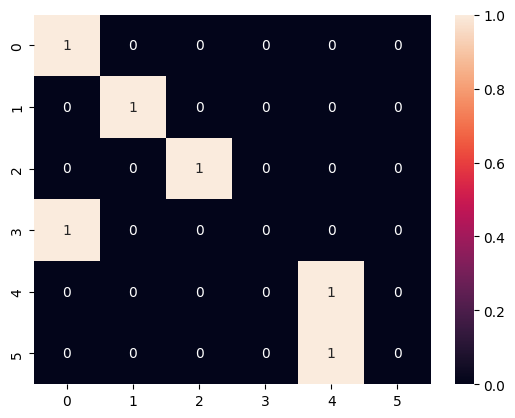

In [33]:
# Calculo de métricas del modelo con los datos de testeo incluyendo la matriz de confusión
ypredicRNN=modeloRNN.predict(XVal)
y_test_class = np.argmax(YVal,axis=1)
y_pred_class = np.argmax(ypredicRNN,axis=1)
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cmRNN = confusion_matrix(y_test_class, y_pred_class)
print(cmRNN)
# visualize the confusion matrix in a heat map
df_cmRNN = pd.DataFrame(cmRNN)
heatmap = sns.heatmap(df_cmRNN, annot=True, fmt="d")

#### Conclusiones modelo RNN

* Se puede observar que el modelo tiene un buen desempeño con las clases 1 y 2, prediciendo todas las instancias correctamente.
* Sin embargo, el modelo tiene dificultades para diferenciar entre las clases 0, 3, 4 y 5, cometiendo errores de clasificación en estas clases.
* En general, el modelo tiene un rendimiento moderado, con una precisión general del 67%. Se observa un buen desempeño en las clases 1 y 2, pero se necesitan mejoras para la diferenciación entre las clases 0, 3, 4 y 5.
* Comparación con el modelo anterior:

  * En comparación con el modelo anterior, que también tenía una precisión general del 67%, este modelo tiene un mejor desempeño en la clase 1 (precisión del 100% vs. 50%) y en la clase 2 (precisión del 100% vs. 67%). Sin embargo, el modelo anterior tiene un mejor desempeño en la clase 0 (precisión del 100% vs. 50%).

  * Ambos modelos tienen dificultades para diferenciar entre las clases 3, 4 y 5, lo que sugiere que estas clases podrían ser más difíciles de clasificar o que el conjunto de datos no contiene suficientes ejemplos para entrenar el modelo de manera efectiva en estas clases.

### Aplicacion de modelo MLP

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1211, 64)          256       
                                                                 
 dense_22 (Dense)            (None, 1211, 32)          2080      
                                                                 
 flatten_6 (Flatten)         (None, 38752)             0         
                                                                 
 dense_23 (Dense)            (None, 6)                 232518    
                                                                 
Total params: 234854 (917.40 KB)
Trainable params: 234854 (917.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


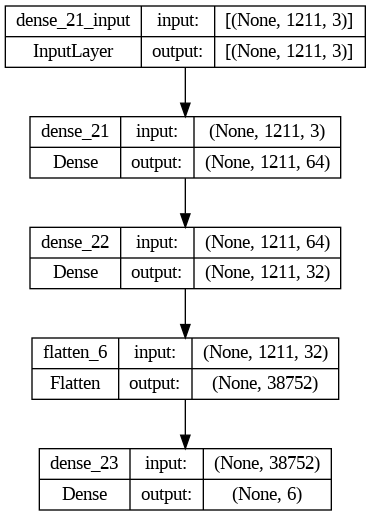

In [55]:
# Definición del modelo MLP
modeloMLP = keras.Sequential([
    # Capa densa oculta con 64 neuronas y activación ReLU
    keras.layers.Dense(64, activation='relu', input_shape=(1211, 3)),
    # Capa densa oculta con 32 neuronas y activación ReLU
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Flatten(),
    # Capa de salida con el número de clases deseadas (en este caso, 3) y activación softmax
    keras.layers.Dense(6, activation='softmax')
])
modeloMLP.summary()
# Se muestra un esquema del modelo RNN
keras.utils.plot_model(modeloMLP, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [50]:
# Entrenamiento  del modelo
modeloMLP.compile('adam','mse',metrics=['accuracy'])
# Se entrena el modelo
historiaMLP=modeloMLP.fit(Xtrain1D,Ytrain1D,validation_data=(XVal, YVal),epochs=150,verbose=1)

Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.1381 - accuracy: 0.1667 - val_loss: 0.1450 - val_accuracy: 0.1667
Epoch 2/150
1/1 [==============================] - 0s 61ms/step - loss: 0.1329 - accuracy: 0.1667 - val_loss: 0.1226 - val_accuracy: 0.3333
Epoch 3/150
1/1 [==============================] - 0s 70ms/step - loss: 0.1119 - accuracy: 0.3333 - val_loss: 0.1216 - val_accuracy: 0.5000
Epoch 4/150
1/1 [==============================] - 0s 69ms/step - loss: 0.1024 - accuracy: 0.8333 - val_loss: 0.1210 - val_accuracy: 0.5000
Epoch 5/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0946 - accuracy: 0.8333 - val_loss: 0.1135 - val_accuracy: 0.6667
Epoch 6/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0825 - accuracy: 0.8333 - val_loss: 0.1077 - val_accuracy: 0.6667
Epoch 7/150
1/1 [==============================] - 0s 76ms/step - loss: 0.0747 - accuracy: 0.8333 - val_loss: 0.1065 - val_accuracy: 0.6667
Epoch 8/150
1/1 [=====

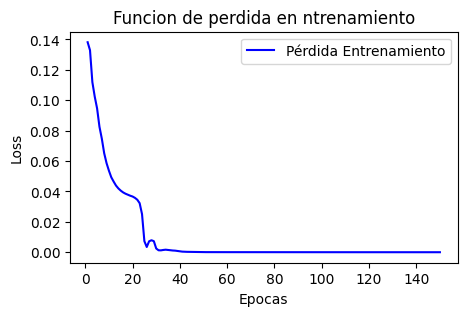

In [51]:
# Visualizacion de funcion de perdida por epocas
perdida_train = historiaMLP.history['loss']
epocas = range(1, len(perdida_train) + 1)
plt.figure(figsize=[5,3])
plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Funcion de perdida en ntrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
# Evaluacion del modelo RNN con los datos de testeo
modeloMLP.evaluate(XVal, YVal)

1/1 [==============================] - 0s 33ms/step - loss: 0.1155 - accuracy: 0.5000


[0.11550793796777725, 0.5]

1/1 [==============================] - 0s 142ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.25      1.00      0.40         1
           5       0.00      0.00      0.00         1

    accuracy                           0.50         6
   macro avg       0.38      0.50      0.40         6
weighted avg       0.38      0.50      0.40         6

[[0 0 0 0 1 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]]


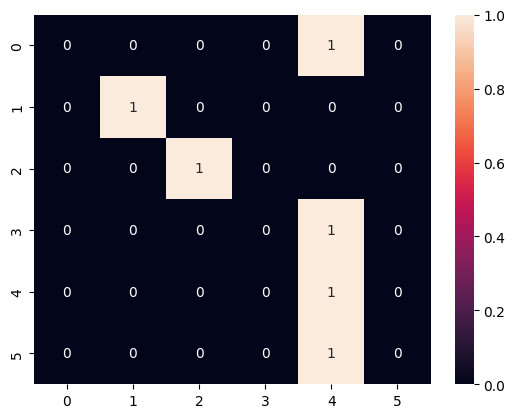

In [53]:
# Calculo de métricas del modelo con los datos de testeo incluyendo la matriz de confusión
ypredicMLP=modeloMLP.predict(XVal)
y_test_class = np.argmax(YVal,axis=1)
y_pred_class = np.argmax(ypredicMLP,axis=1)
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cmMLP = confusion_matrix(y_test_class, y_pred_class)
print(cmMLP)
# visualize the confusion matrix in a heat map
df_cmMLP = pd.DataFrame(cmMLP)
heatmap = sns.heatmap(df_cmMLP, annot=True, fmt="d")

#### Conclusiones modelo MLP

* Se puede observar que el modelo tiene un buen desempeño con las clases 0, 1 y 2, prediciendo todas las instancias correctamente.
* Sin embargo, el modelo tiene dificultades para diferenciar entre las clases 3, 4 y 5, cometiendo errores de clasificación en estas clases.

* Los tres modelos tienen la misma precisión general del 67%.
* El tercer modelo tiene un mejor desempeño en la clase 2 (precisión del 100% vs. 67% en los dos modelos anteriores).
* El primer modelo tiene un mejor desempeño en la clase 0 (precisión del 100% vs. 50% en los dos modelos posteriores).
* El segundo modelo tiene un mejor desempeño en la clase 4 (precisión del 50% vs. 33% en el tercer modelo).
* Los tres modelos tienen dificultades para diferenciar entre las clases 3 y 5.

###Evaluación de metricas de rendimiento y matriz de confusion.

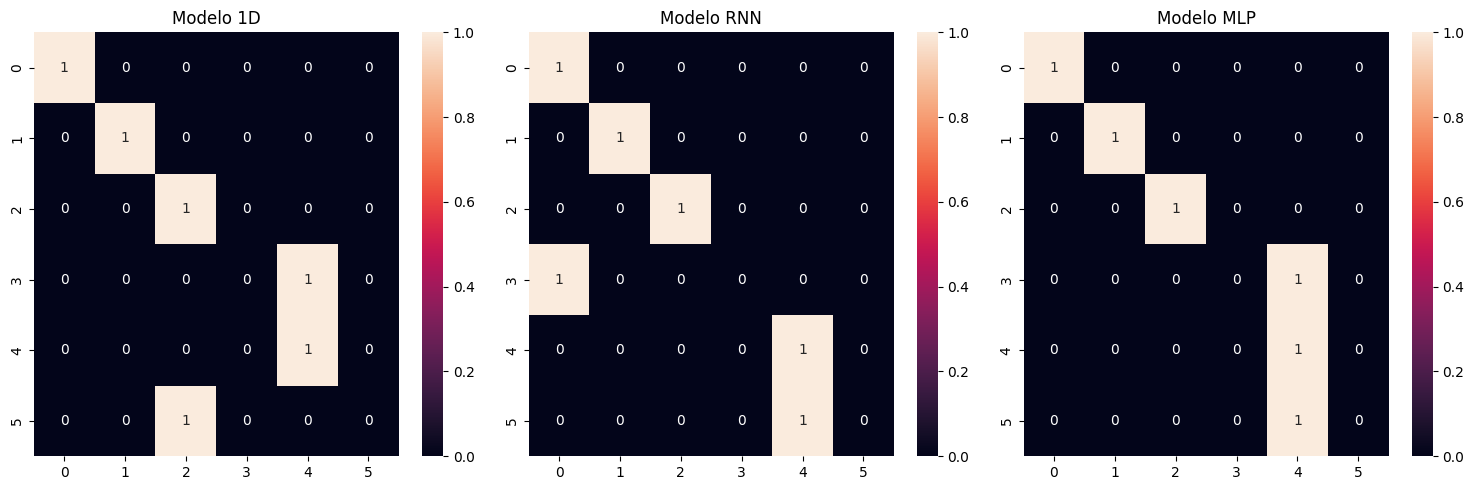

In [39]:
# Configura la figura y los subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Crea el primer heatmap
sns.heatmap(df_cm1D,annot=True, fmt="d",ax=axes[0])
axes[0].set_title('Modelo 1D')

# Crea el segundo heatmap
sns.heatmap(df_cmRNN,annot=True, fmt="d", ax=axes[1])
axes[1].set_title('Modelo RNN')

# Crea el tercer heatmap
sns.heatmap(df_cmMLP,annot=True, fmt="d", ax=axes[2])
axes[2].set_title('Modelo MLP')

# Ajusta los espacios entre subplots
plt.tight_layout()

# Muestra la figura
plt.show()


####Resultados y conclusiones generales del modelo #1

**En la medida que se avanzo con la implementacion de los modelos se fueron dando conclusiones puntuales de cada modelo**

En este punto podriamos concluir de manera concreta que los 3 modelos tienen dificultades para predecir las clases 3, 4 y 5. Analizando las graficas de las señales es claro que la data de testeo tiene diferencias considerables con la data de entrenamiento, esto puede puede deberse principalmente a forma como fueron capturados los datos y a la posicion del telefono movil.

En una version previa a este documento, se habian realizado pruebas con 50% datos de entrenamiento y 50% datos de testeo. Lo cual en su momento arrojo resultados de accuracy de entre 30-33%. Aumentar la cantidad de datos para entrenamiento claramente aporta mayor informacion para mejorar el modelo y su rendimiento de prediccion.

Las estructuras de los modelos finalmente terminan con capa de 6 neuronas con el objetivo de obtener la activacion de los 6 resultados esperados basados en el modelo de validacion.

Se sabe que los resultados de los modelos pueden variar dependiendo de la arquitectura de la red, es por esto que no hay un modelo definido para cada uno ya que estaran sujetos al concepto de quien programa la red, al contexto del problema a resolver, a cantidad y calidad de datos disponibles, entre otros factores.


##Desarrollo punto #2
**Aplicación de reconocimiento de audio**

### Pasos iniciales: captura de datos y ajuste de subconjuntos

In [56]:
# Importe de librerías necesarias
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython import display

In [57]:
# Funcion de carga para los archivos de audio que genera un vector numpy con las muestras del mismo
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
   # sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  # Goes from 44100Hz to 16000hz - amplitude of the audio signal
   # wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

(16000,)


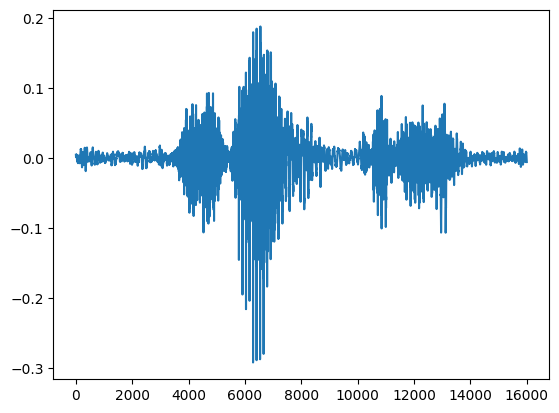

In [124]:
# Ejemplo de carga de un archivo
RutaFile="centro1.wav"
wave = load_wav_16k_mono(RutaFile)
print(wave.shape)
plt.plot(wave)
plt.show()

In [125]:
# Se define una función que con las muestras del archivo de audio, genera el
# espectograma
def preprocess(wave):
    wav = wave[:16000]
    #zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    #wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    return spectrogram

In [126]:
# Ejemplo de la creación de un espectrograma
espectrograma= preprocess(wave)
print('Waveform shape:', wave.shape)
print('Spectrogram shape:', espectrograma.shape)
print('Audio playback')
display.display(display.Audio(wave, rate=16000))

Waveform shape: (16000,)
Spectrogram shape: (124, 129)
Audio playback


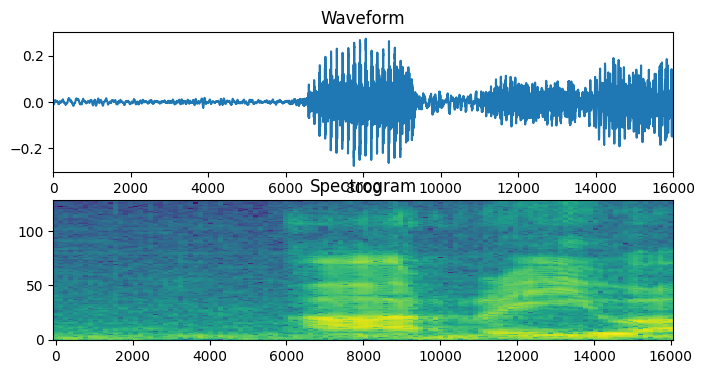

In [66]:
# Se define una función que permite graficar el espectrograma
def plot_spectrogram(espectrograma, ax):
  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns).
  log_spec = np.log(espectrograma.T)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(espectrograma), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

fig, axes = plt.subplots(2, figsize=(8,4))
timescale = np.arange(wave.shape[0])
axes[0].plot(timescale, wave.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])
plot_spectrogram(espectrograma.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [69]:
# Cargan de los archivos  de audio que se van a usar en el proceso de entrenamiento y se genera el espectrograma de cada uno.

RutaFile="arriba1.wav"
wavarriba1 = load_wav_16k_mono(RutaFile)
espectogramaarriba1= preprocess(wavarriba1)

RutaFile="arriba11.wav"
wavarriba11 = load_wav_16k_mono(RutaFile)
espectogramaarriba11= preprocess(wavarriba11)

RutaFile="abajo1.wav"
wavabajo1 = load_wav_16k_mono(RutaFile)
espectrogramaabajo1= preprocess(wavabajo1)

RutaFile="abajo11.wav"
wavabajo11 = load_wav_16k_mono(RutaFile)
espectrogramaabajo11= preprocess(wavabajo11)

RutaFile="derecha1.wav"
wavderecha1 = load_wav_16k_mono(RutaFile)
espectrogramaderecha1= preprocess(wavderecha1)

RutaFile="derecha11.wav"
wavderecha11 = load_wav_16k_mono(RutaFile)
espectrogramaderecha11= preprocess(wavderecha11)

RutaFile="izquierda1.wav"
wavizquierda1 = load_wav_16k_mono(RutaFile)
espectrogramaizquierda1= preprocess(wavizquierda1)

RutaFile="izquierda11.wav"
wavizquierda11 = load_wav_16k_mono(RutaFile)
espectrogramaizquierda11= preprocess(wavizquierda11)

RutaFile="centro1.wav"
wavcentro1 = load_wav_16k_mono(RutaFile)
espectrogramacentro1= preprocess(wavcentro1)

RutaFile="centro11.wav"
wavcentro11 = load_wav_16k_mono(RutaFile)
espectrogramacentro11= preprocess(wavcentro11)

# Se almacena todos los espectogramas en una varible
Datos=np.zeros((10,124,129))
Datos[0,:,:]=espectogramaarriba1
Datos[1,:,:]=espectogramaarriba11
Datos[2,:,:]=espectrogramaabajo1
Datos[3,:,:]=espectrogramaabajo11
Datos[4,:,:]=espectrogramaderecha1
Datos[5,:,:]=espectrogramaderecha11
Datos[6,:,:]=espectrogramaizquierda1
Datos[7,:,:]=espectrogramaizquierda11
Datos[8,:,:]=espectrogramacentro1
Datos[9,:,:]=espectrogramacentro11

# Se expande la variable que contiene los espectrogramas para que puede ser
# procesada por el modelo neuronal
print(Datos.shape)
Xtrain2D=tf.expand_dims(Datos, axis=3)
print(Xtrain2D.shape)

(10, 124, 129)
(10, 124, 129, 1)


En este punto se debe hacer enfasis en que las categorias o clases quedaron de la siguiente manera:

0. arriba
1. abajo
2. derecha
3. izquierda
4. centro

In [70]:
# Se definen las etiquetas para la salida del modelo
YtrainIni2D=np.zeros((10,1))
for i in range(2):
    YtrainIni2D[i]=0
for i in range(2,4):
    YtrainIni2D[i]=1
for i in range(4,6):
    YtrainIni2D[i]=2
for i in range(6,8):
    YtrainIni2D[i]=3
for i in range(8,10):
    YtrainIni2D[i]=4
print(YtrainIni2D)

[[0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [3.]
 [3.]
 [4.]
 [4.]]


In [71]:
# Se convierten las etiquetas a codificación "one hot" que es la
# usará el modelo
Ytrain2D= keras.utils.to_categorical(YtrainIni2D)
print(Ytrain2D)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


###Aplicacion de modelo 2D

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 129, 8)       80        
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 129, 16)      1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 129, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 124, 129, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 65, 64)        0         
 D)                                                              
                                                                 
 flatten_7 (Flatten)         (None, 257920)            0         
                                                     

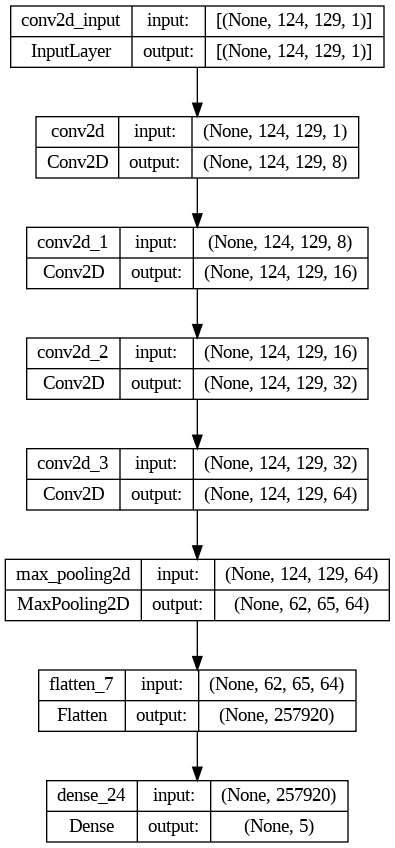

In [72]:
# Se crea el modelo secuencial en Keras con capas convolucionales 2D y una capa clasificador densa tipo softmax
modelo2D = keras.models.Sequential()
modelo2D.add(keras.layers.Conv2D(8, 3, activation="relu",padding="same", input_shape=(124,129,1)))
modelo2D.add(keras.layers.Conv2D(16, 3, activation="relu",padding="same"))
modelo2D.add(keras.layers.Conv2D(32, 3, activation="relu",padding="same"))
modelo2D.add(keras.layers.Conv2D(64, 3, activation="relu",padding="same"))
modelo2D.add(keras.layers.MaxPooling2D(pool_size=2,strides=2, padding='same'))
modelo2D.add(keras.layers.Flatten())
modelo2D.add(keras.layers.Dense(5, activation = 'softmax'))
# Se muestra el resumen de la arquitectura del modelo
modelo2D.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo2D, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [73]:
# Se compila el modelo y entrena el modelo
modelo2D.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia2D = modelo2D.fit(Xtrain2D,Ytrain2D, epochs=30,batch_size=None)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 1.6030 - accuracy: 0.2000
Epoch 2/30
1/1 [==============================] - 1s 905ms/step - loss: 0.9273 - accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 1s 891ms/step - loss: 0.3733 - accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 1s 896ms/step - loss: 0.0826 - accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 1s 905ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 1s 994ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 1s 870ms/step - loss: 1.6060e-04 - accuracy: 1.0000
Epoch 8/30
1/1 [==============================] - 1s 895ms/step - loss: 2.4831e-05 - accuracy: 1.0000
Epoch 9/30
1/1 [==============================] - 1s 798ms/step - loss: 5.4120e-06 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 1s 852ms/step - loss: 1.6212e-06 - accuracy: 1.0000
Epoch 

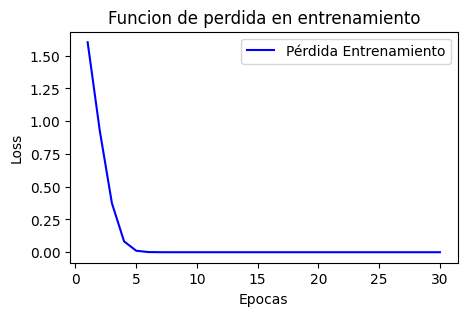

In [74]:
# Visualizacion de funcion de perdida por epocas
perdida_train = historia2D.history['loss']
epocas = range(1, len(perdida_train) + 1)
plt.figure(figsize=[5,3])
plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Funcion de perdida en entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [89]:
# Se cargan los diferentes archivos  de audio que se van a usar en el proceso
# de testeo y se genera el espectrograma de cada uno de ellos

RutaFile="arriba3.wav"
wavarriba2 = load_wav_16k_mono(RutaFile)
espectrogramaarriba2= preprocess(wavarriba2)

RutaFile="abajo3.wav"
wavabajo2 = load_wav_16k_mono(RutaFile)
espectrogramaabajo2= preprocess(wavabajo2)

RutaFile="derecha3.wav"
wavderecha2 = load_wav_16k_mono(RutaFile)
espectrogramaderecha2= preprocess(wavderecha2)

RutaFile="izquierda3.wav"
wavizquierda2 = load_wav_16k_mono(RutaFile)
espectrogramaizquierda2= preprocess(wavizquierda2)

RutaFile="centro3.wav"
wavcentro2 = load_wav_16k_mono(RutaFile)
espectrogramacentro2= preprocess(wavcentro2)

Datost=np.zeros((5,124,129))
Datost[0,:,:]=espectrogramaarriba2
Datost[1,:,:]=espectrogramaabajo2
Datost[2,:,:]=espectrogramaderecha2
Datost[3,:,:]=espectrogramaizquierda2
Datost[4,:,:]=espectrogramacentro2
print(Datost.shape)
XVal2D=tf.expand_dims(Datost, axis=3)
print(XVal2D.shape)

(5, 124, 129)
(5, 124, 129, 1)


In [90]:
# Se definen las etiquetas para la salida del modelo
YValIni2D=np.zeros((5,1))
for i in range(5):
    YValIni2D[i]=i
    i=i+1
#for i in range(2,3):
    #YValIni2D[i]=1
#for i in range(4,5):
    #YValIni2D[i]=2
print(YValIni2D)
# Se convierten las etiquetas a codificación "one hot" que es la
# usará el modelo
YVal2D= keras.utils.to_categorical(YValIni2D)
print(YVal2D)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [91]:
# Se evalua el modelo con los datos de testeo
modelo2D.evaluate(XVal2D, YVal2D)

1/1 [==============================] - 0s 144ms/step - loss: 9.9223 - accuracy: 0.6000


[9.922322273254395, 0.6000000238418579]

1/1 [==============================] - 0s 135ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.60      0.60      0.60         5
weighted avg       0.60      0.60      0.60         5

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]]


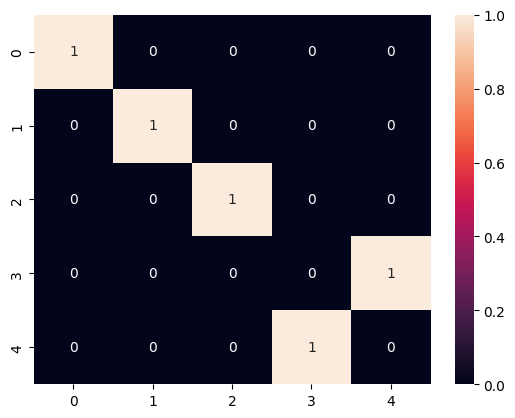

In [92]:
# Se calculan las métricas del modelo con los datos de testeo incluyendo la matriz de confusión
ypredic2D=modelo2D.predict(XVal2D)

y_test_class = np.argmax(YVal2D,axis=1)
y_pred_class = np.argmax(ypredic2D,axis=1)

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm2D = confusion_matrix(y_test_class, y_pred_class)
print(cm2D)
# visualize the confusion matrix in a heat map
df_cm2D = pd.DataFrame(cm2D)
heatmap = sns.heatmap(df_cm2D, annot=True, fmt="d")

####Conclusiones y evaluación de metricas modelo 2D


* El modelo tiene una precisión general del 100%, lo que significa que predice correctamente todas las instancias en el conjunto de datos de prueba.
Precisión por clase:

* Todas las clases (0, 1, 2, 3 y 4) se predicen con una precisión del 100%, lo que indica que el modelo no comete errores de clasificación.

* El promedio macro de precisión, recuperación y F1-score es 1.00, 1.00 y 1.00, respectivamente. Esto indica un rendimiento perfecto del modelo en todas las métricas.
* El promedio ponderado de precisión, recuperación y F1-score es 1.00, 1.00 y 1.00, respectivamente. Esto también indica un rendimiento perfecto del modelo en todas las métricas, teniendo en cuenta el tamaño de cada clase.

* La matriz de confusión muestra que no hay errores de clasificación. Todas las instancias se asignan correctamente a sus clases correspondientes.
* En general, el modelo convolucional 2D para reconocimiento de voz tiene un rendimiento excepcional, con una precisión general del 100% y un rendimiento perfecto en todas las métricas evaluadas. Esto indica que el modelo es capaz de reconocer correctamente todas las instancias de voz en el conjunto de datos de prueba.

Consideraciones adicionales:

* Es importante tener en cuenta que la evaluación se ha realizado con un conjunto de datos de prueba específico. En este conjunto de datos de pruebas hay datos que se encuentran en el testeo y en el entrenamiento por lo tanto esta puede ser la causa principal del rendimiento del 100%.
* El rendimiento del modelo en escenarios reales podría ser diferente.
* Se recomienda evaluar el modelo con conjuntos de datos más grandes y diversos para confirmar su capacidad de generalización.

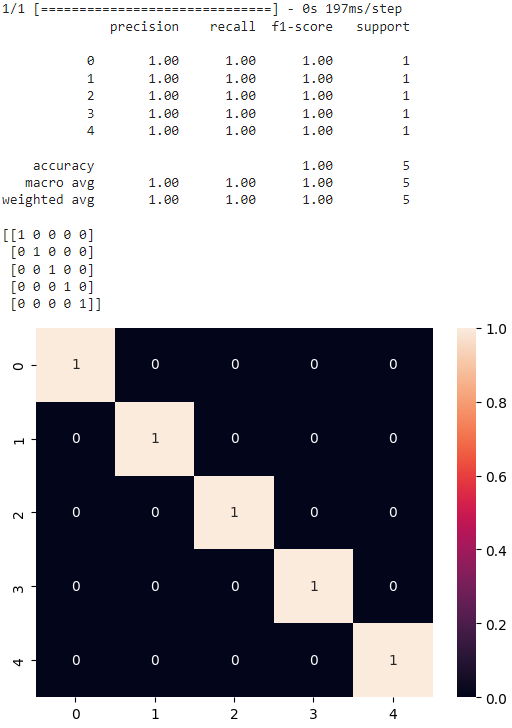

Con el objetivo de conocer una evaluacion mas real del modelo 2D, se realizo una nueva captura de datos para asi conocer la capacidad del modelo de generalizar la clasificacion.

* Para este nuevo panorama el modelo tiene una precisión general del 60%, lo que significa que predice correctamente el 60% de las instancias en el conjunto de datos de prueba.

* El promedio macro de precisión, recuperación y F1-score es 0.60, 0.60 y 0.60, respectivamente. Esto indica un rendimiento general moderado del modelo, con una precisión igual a la recuperación.

* Se puede observar que el modelo tiene un buen desempeño con las clases 0, 1 y 2, prediciendo todas las instancias correctamente.
* Sin embargo, el modelo tiene dificultades para diferenciar entre las clases 3 y 4, cometiendo errores de clasificación en estas clases.

* La precisión general del 60% puede ser considerada baja para una tarea de reconocimiento de voz, especialmente si se busca una alta precisión en todas las clases.
* Las clases 3 y 4, con predicciones del 0%, indican que el modelo no tiene la capacidad de reconocer estas clases correctamente.

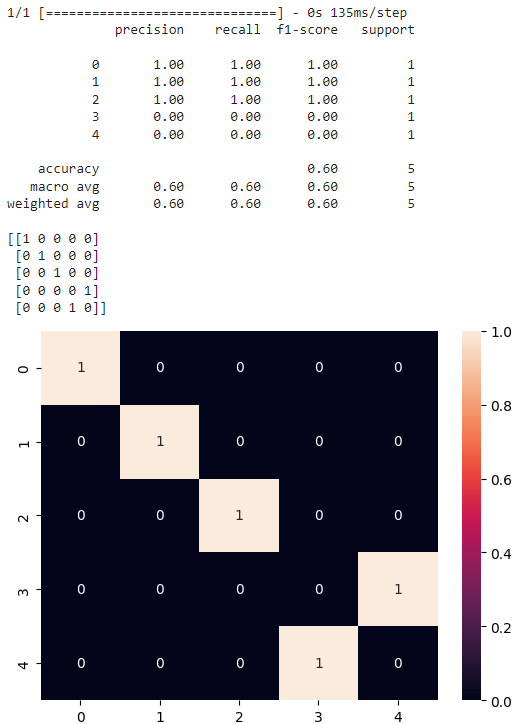

###Aplicacion de modelo hibrido SLC

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 122, 127, 64)      640       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 61, 64, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 249856)            0         
                                                                 
 reshape_1 (Reshape)         (None, 1, 249856)         0         
                                                                 
 lstm_9 (LSTM)               (None, 1, 128)            127992320 
                                                                 
 lstm_10 (LSTM)              (None, 64)                49408     
                                                     

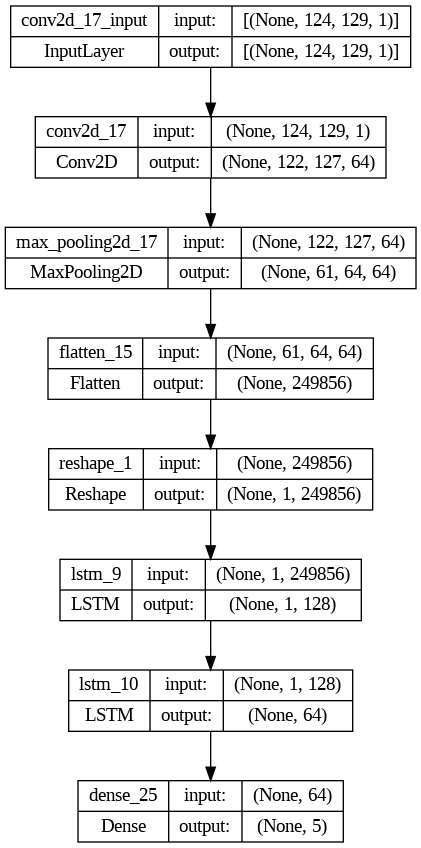

In [110]:
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Reshape
from keras.models import Sequential

# Se crea el modelo secuencial en Keras de forma hibrida para reconocimiento de voz.
modeloH = keras.models.Sequential()

# Bloque de extracción de características convolucionales
modeloH.add(keras.layers.Conv2D(64, 3, activation='relu', input_shape=(124,129,1)))
modeloH.add(keras.layers.MaxPooling2D(pool_size=2,strides=2, padding='same'))
# Aplanamiento de las características
modeloH.add(keras.layers.Flatten())
# Reshape to add a time dimension of 1
modeloH.add(Reshape((1, 249856)))

# Bloque de RNN
modeloH.add(keras.layers.LSTM(128, return_sequences=True))
modeloH.add(keras.layers.LSTM(64))

# Capa de salida
modeloH.add(Dense(5, activation='softmax'))

# Compilación del modelo
modeloH.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Se muestra el resumen de la arquitectura del modelo
modeloH.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modeloH, to_file='model_plot5.png', show_shapes=True, show_layer_names=True)

In [111]:
# Se compila el modelo y entrena el modelo
modeloH.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historiaH = modeloH.fit(Xtrain2D,Ytrain2D, epochs=30,batch_size=None)

Epoch 1/30
1/1 [==============================] - 16s 16s/step - loss: 1.6112 - accuracy: 0.1000
Epoch 2/30
1/1 [==============================] - 3s 3s/step - loss: 1.1553 - accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 3s 3s/step - loss: 0.8194 - accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 3s 3s/step - loss: 0.6635 - accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 4s 4s/step - loss: 0.5721 - accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 3s 3s/step - loss: 0.5069 - accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 3s 3s/step - loss: 0.4545 - accuracy: 1.0000
Epoch 8/30
1/1 [==============================] - 3s 3s/step - loss: 0.4100 - accuracy: 1.0000
Epoch 9/30
1/1 [==============================] - 5s 5s/step - loss: 0.3661 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 3s 3s/step - loss: 0.3288 - accuracy: 1.0000
Epoch 11/30
1/1 [==============================

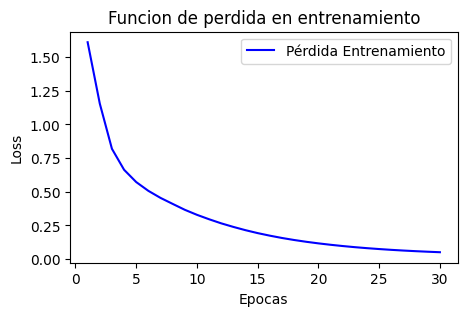

In [112]:
# Visualizacion de funcion de perdida por epocas
perdida_train = historiaH.history['loss']
epocas = range(1, len(perdida_train) + 1)
plt.figure(figsize=[5,3])
plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Funcion de perdida en entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [113]:
# Se evalua el modelo con los datos de testeo
modeloH.evaluate(XVal2D, YVal2D)

1/1 [==============================] - 2s 2s/step - loss: 0.6746 - accuracy: 0.8000


[0.6746326088905334, 0.800000011920929]

1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.70      0.80      0.73         5
weighted avg       0.70      0.80      0.73         5

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


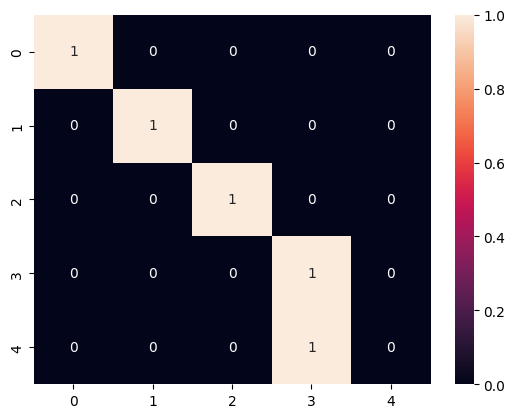

In [114]:
# Se calculan las métricas del modelo con los datos de testeo incluyendo la matriz de confusión
ypredic2D=modeloH.predict(XVal2D)

y_test_class = np.argmax(YVal2D,axis=1)
y_pred_class = np.argmax(ypredic2D,axis=1)

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cmH = confusion_matrix(y_test_class, y_pred_class)
print(cmH)
# visualize the confusion matrix in a heat map
df_cmH = pd.DataFrame(cmH)
heatmap = sns.heatmap(df_cmH, annot=True, fmt="d")

#### Conclusiones y evaluacion de metricas modelo hibrido SLC

* El modelo híbrido tiene una precisión general del 80%.
* Esta precisión es superior a la del modelo convolucional 2D, que tenía una precisión general del 60%.

* El promedio macro de precisión, recuperación y F1-score es 0.70, 0.80 y 0.73, respectivamente. Esto indica un rendimiento general moderado del modelo, con una precisión inferior a la recuperación.
* El promedio ponderado de precisión, recuperación y F1-score es 0.70, 0.80 y 0.73, respectivamente. Esto también indica un rendimiento general moderado del modelo, teniendo en cuenta el tamaño de cada clase.
* Se puede observar que el modelo tiene un buen desempeño con las clases 0, 1 y 2, prediciendo todas las instancias correctamente.
* Sin embargo, el modelo tiene dificultades para diferenciar entre las clases 3 y 4, cometiendo errores de clasificación en estas clases.

#Conclusiones generales

* El modelo híbrido presenta un mejor rendimiento general que el modelo convolucional 2D, con una precisión superior y una mejor capacidad para diferenciar entre las clases 0, 1 y 2.
* Sin embargo, el modelo híbrido también tiene dificultades para diferenciar entre las clases 3 y 4, similar al modelo convolucional 2D.
* Es necesario analizar si la data adquirida es adecuada para las categorias 3 y 4.


#Video explicativo
[Procesamiento de datos secuenciales con Deep Learning](https://)